In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("general_data.csv")

In [10]:
data.shape

(4410, 24)

In [11]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [12]:
columns = " -|- ".join(list(data.columns))
columns

'Age -|- Attrition -|- BusinessTravel -|- Department -|- DistanceFromHome -|- Education -|- EducationField -|- EmployeeCount -|- EmployeeID -|- Gender -|- JobLevel -|- JobRole -|- MaritalStatus -|- MonthlyIncome -|- NumCompaniesWorked -|- Over18 -|- PercentSalaryHike -|- StandardHours -|- StockOptionLevel -|- TotalWorkingYears -|- TrainingTimesLastYear -|- YearsAtCompany -|- YearsSinceLastPromotion -|- YearsWithCurrManager'

In [17]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [18]:
data = data.drop_duplicates()

In [22]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [94]:
# now we need to analyze the numerical variables:
ToKeep = []
for i in range(len(data_types.index)):
    if str(data_types[i]) != "object":
        ToKeep.append(data_types.index[i])
    else:
        continue
ToKeep.remove("EmployeeID")
data_nums = data[ToKeep]
ToKeep

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [103]:
from scipy.stats import iqr
iqr_list =[]
for i in ToKeep:
    q = iqr(data[i])
    iqr_list.append(q)

dnmo = data_nums.mode().sum()
dnme = data_nums.median()
dnmm = data_nums.mean()
dnms = data_nums.std()
dnmv = data_nums.var()
dnmk = data_nums.kurt()
dnmw = data_nums.skew()
dataset = pd.DataFrame({'mode': dnmo, "mean": dnmm ,'median': dnme, 'standard_deviation' : dnms,'variance' : dnmv,'kurtosis' : dnmk
                        ,'skewness': dnmw}, columns=['mode','mean', 'median','standard_deviation','variance','kurtosis','skewness'])
dataset["IQR"] = iqr_list
dataset

,mode,mean,median,standard_deviation,variance,kurtosis,skewness,IQR
Age,35.0,36.923810,36.0,9.133301,8.341719e+01,-0.405951,0.413005,13.0
DistanceFromHome,2.0,9.192517,7.0,8.105026,6.569144e+01,-0.227045,0.957466,12.0
Education,3.0,2.912925,3.0,1.023933,1.048438e+00,-0.560569,-0.289484,2.0
EmployeeCount,1.0,1.000000,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
JobLevel,1.0,2.063946,2.0,1.106689,1.224760e+00,0.395525,1.024703,2.0
MonthlyIncome,23420.0,65029.312925,49190.0,47068.888559,2.215480e+09,1.000232,1.368884,54690.0
NumCompaniesWorked,1.0,2.694830,2.0,2.498887,6.244436e+00,0.007287,1.026767,NaN
PercentSalaryHike,11.0,15.209524,14.0,3.659108,1.338907e+01,-0.302638,0.820569,6.0
StandardHours,8.0,8.000000,8.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
StockOptionLevel,0.0,0.793878,1.0,0.851883,7.257053e-01,0.361086,0.968321,1.0


In [25]:
data_nums.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


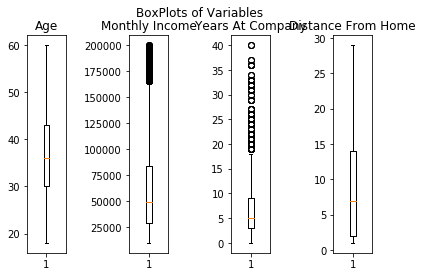

In [26]:
fig, axs = plt.subplots(1,4);
fig.suptitle('BoxPlots of Variables');
axs[0].boxplot (data["Age"]);
axs[0].set_title('Age');
axs[1].boxplot (data["MonthlyIncome"]);
axs[1].set_title('Monthly Income');
axs[2].boxplot (data["YearsAtCompany"]);
axs[2].set_title('Years At Company');
axs[3].boxplot (data["DistanceFromHome"]);
axs[3].set_title('Distance From Home');
fig.subplots_adjust(left=0.1, wspace=1.6);

#No outliers detected in Age and Distance variables, but Monthly Income and Years At Company are having several outliers;

In [42]:
pd.crosstab(data.JobLevel, data.Attrition)

Attrition,No,Yes
JobLevel,,
1,1377,252
2,1317,285
3,558,96
4,267,51
5,180,27


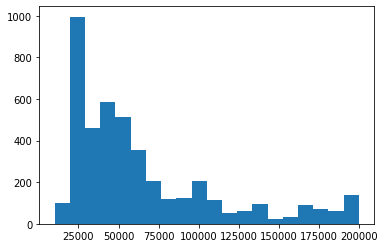

In [46]:
plt.hist(data_nums["MonthlyIncome"], bins = 20); # a right skewed data;

In [28]:
pd.crosstab(data["Department"], data["Attrition"])

Attrition,No,Yes
Department,,
Human Resources,132,57
Research & Development,2430,453
Sales,1137,201


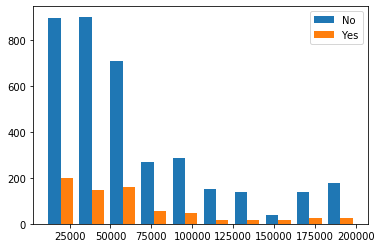

In [80]:
attr = data.Attrition.unique()
plt.hist([data.loc[data.Attrition == x, 'MonthlyIncome'] for x in attr], label=attr);
plt.legend(attr);

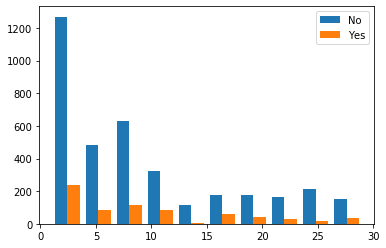

In [105]:
attr = data.Attrition.unique()
plt.hist([data.loc[data.Attrition == x, 'DistanceFromHome'] for x in attr], label=attr);
plt.legend(attr);
#it is surprising that the employees who have lived relatively closer to the company, had more attritions;

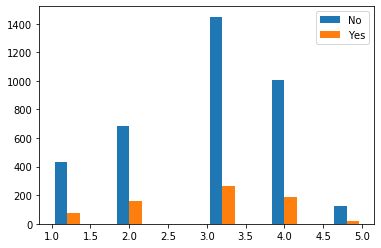

In [107]:
attr = data.Attrition.unique()
plt.hist([data.loc[data.Attrition == x, 'Education'] for x in attr], label=attr);
plt.legend(attr);
#people in the middle education level are more likely to live the company; 

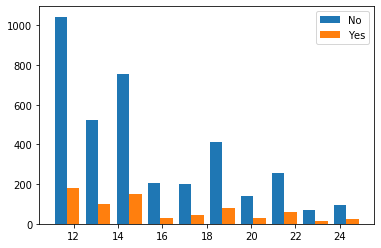

In [108]:
attr = data.Attrition.unique()
plt.hist([data.loc[data.Attrition == x, 'PercentSalaryHike'] for x in attr], label=attr);
plt.legend(attr);
#it is more likely for people with low percentage hike in their salary to live the company;